In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df = df.drop('Person ID', axis=1)

In [9]:
df.isna().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('unknown')

In [11]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [12]:
df['Sleep Disorder'].unique()

array(['unknown', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [13]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [14]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

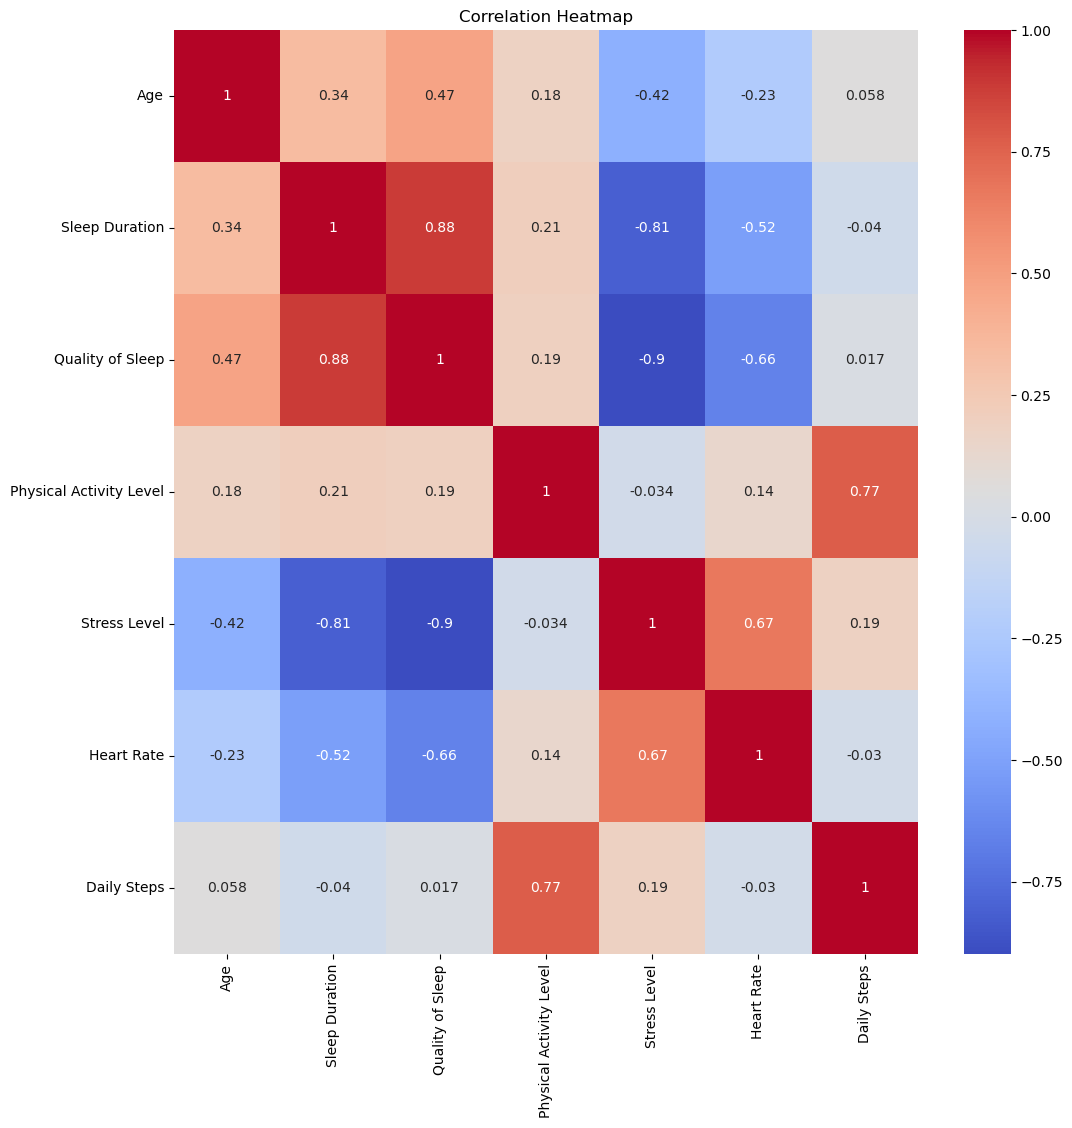

In [15]:
numeric_df = df.select_dtypes(include=['number'])

# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Categorical Variables

In [16]:
sleep_dis_counts = df['Sleep Disorder'].value_counts()
sleep_dis_counts

Sleep Disorder
unknown        219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

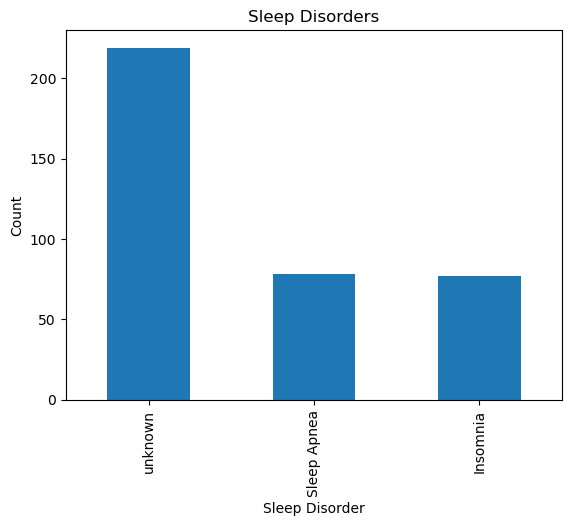

In [17]:
plt.figure()
ax = sleep_dis_counts.plot(kind='bar')
ax.set_title("Sleep Disorders")
ax.set_ylabel("Count")
plt.show()

In [18]:
occ_counts = df['Occupation'].value_counts()
occ_counts

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

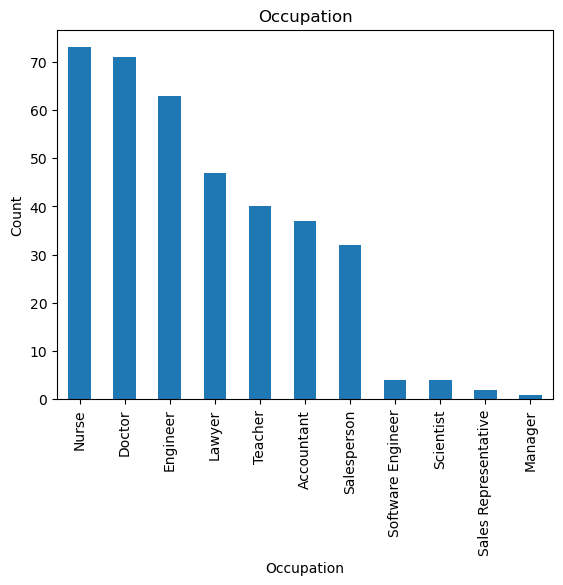

In [19]:
plt.figure()
ax = occ_counts.plot(kind='bar')
ax.set_title("Occupation")
ax.set_ylabel("Count")
plt.show()

In [20]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Male      189
Female    185
Name: count, dtype: int64

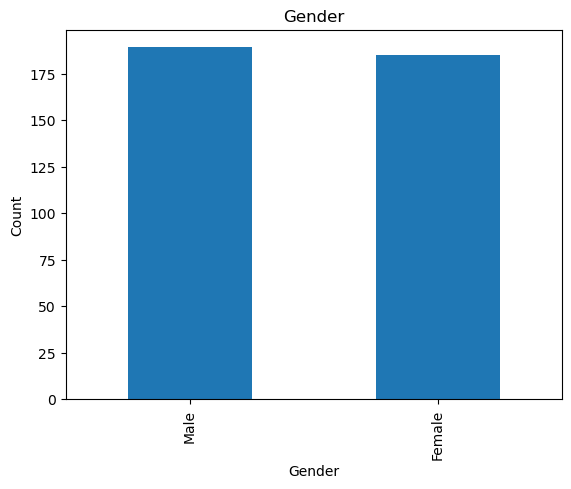

In [21]:
plt.figure()
ax = gender_counts.plot(kind='bar')
ax.set_title("Gender")
ax.set_ylabel("Count")
plt.show()

In [22]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [23]:
df['BMI Category'] = df['BMI Category'].replace({
    'Normal': 'Normal Weight'
})

In [24]:
bmi_counts = df['BMI Category'].value_counts()
bmi_counts

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

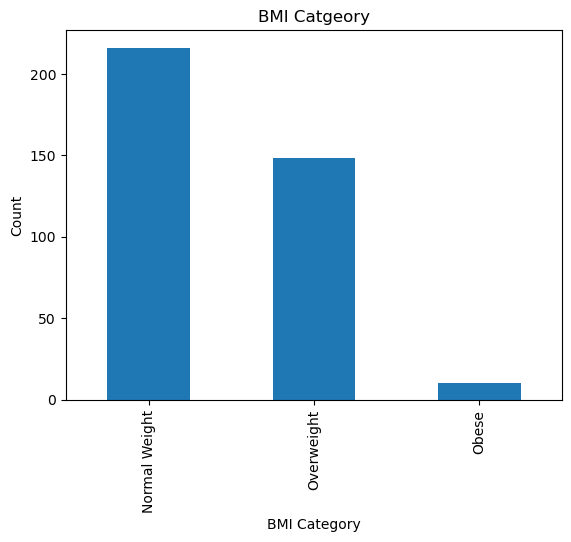

In [25]:
plt.figure()
ax = bmi_counts.plot(kind='bar')
ax.set_title("BMI Catgeory")
ax.set_ylabel("Count")
plt.show()

In [26]:
workout_type_gender = df[["Sleep Disorder","BMI Category"]]
counts = pd.crosstab(df["Sleep Disorder"],df["BMI Category"])
counts

BMI Category,Normal Weight,Obese,Overweight
Sleep Disorder,,,
Insomnia,9,4,64
Sleep Apnea,7,6,65
unknown,200,0,19


<Figure size 640x480 with 0 Axes>

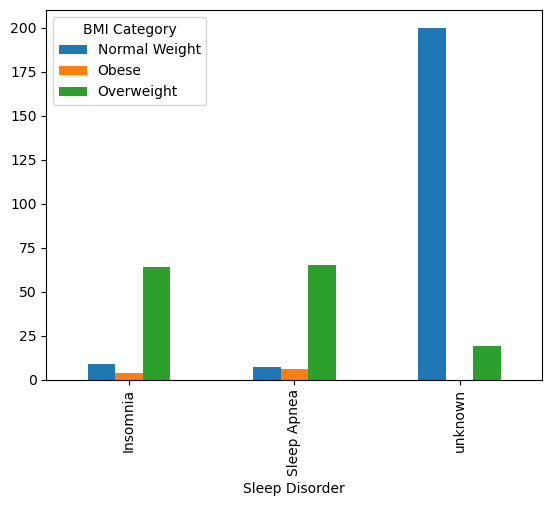

In [27]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [28]:
workout_type_gender = df[["Gender","Sleep Disorder"]]
counts = pd.crosstab(df["Gender"],df["Sleep Disorder"])
counts

Sleep Disorder,Insomnia,Sleep Apnea,unknown
Gender,,,
Female,36,67,82
Male,41,11,137


<Figure size 640x480 with 0 Axes>

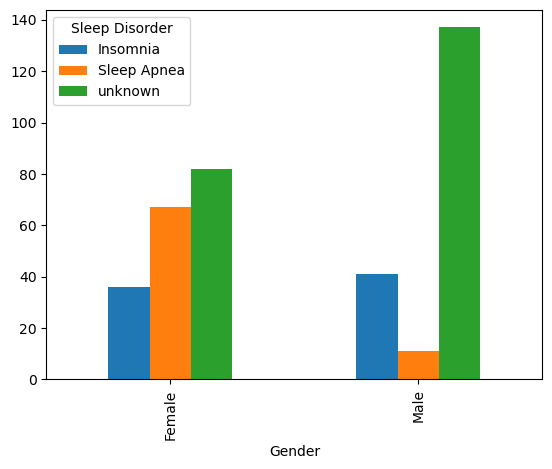

In [29]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [30]:
workout_type_gender = df[["Gender","BMI Category"]]
counts = pd.crosstab(df["Gender"],df["BMI Category"])
counts

BMI Category,Normal Weight,Obese,Overweight
Gender,,,
Female,78,1,106
Male,138,9,42


<Figure size 640x480 with 0 Axes>

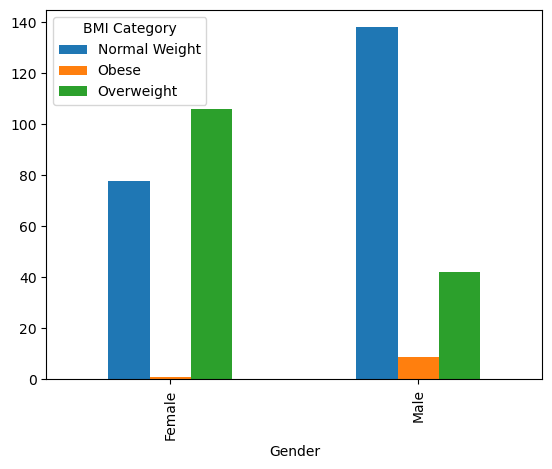

In [31]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

In [32]:
workout_type_gender = df[["BMI Category","Occupation"]]
counts = pd.crosstab(df["BMI Category"],df["Occupation"])
counts

Occupation,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
BMI Category,,,,,,,,,,,
Normal Weight,31,67,60,43,0,7,0,0,0,2,6
Obese,0,4,0,2,0,0,2,0,0,1,1
Overweight,6,0,3,2,1,66,0,32,4,1,33


<Figure size 640x480 with 0 Axes>

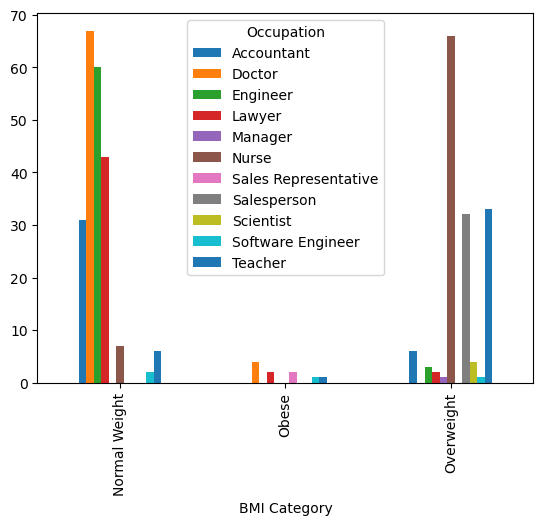

In [33]:
plt.figure()
counts.plot.bar(stacked=False)
plt.show()

## Numerical Variables

Text(0.5, 1.0, 'Age')

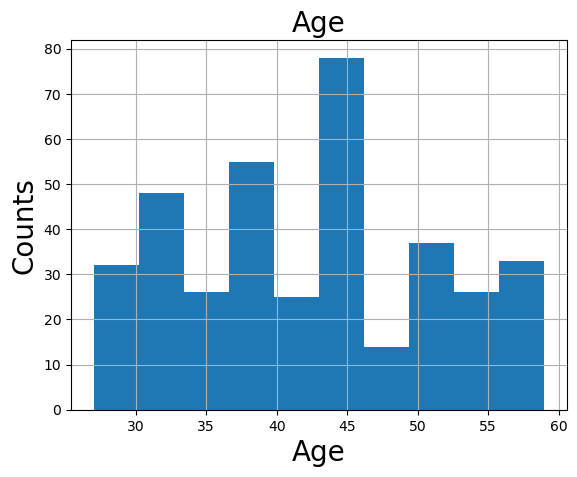

In [34]:
ax = df['Age'].hist()
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Counts",fontsize=20)
ax.set_title("Age",fontsize=20)

In [35]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Find relevant pairs based on correlation
relevant_pairs = [
    (col1, col2)
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.5
]

print("Relevant Pairs Based on Correlation:", relevant_pairs)

Relevant Pairs Based on Correlation: [('Sleep Duration', 'Quality of Sleep'), ('Sleep Duration', 'Stress Level'), ('Sleep Duration', 'Heart Rate'), ('Quality of Sleep', 'Sleep Duration'), ('Quality of Sleep', 'Stress Level'), ('Quality of Sleep', 'Heart Rate'), ('Physical Activity Level', 'Daily Steps'), ('Stress Level', 'Sleep Duration'), ('Stress Level', 'Quality of Sleep'), ('Stress Level', 'Heart Rate'), ('Heart Rate', 'Sleep Duration'), ('Heart Rate', 'Quality of Sleep'), ('Heart Rate', 'Stress Level'), ('Daily Steps', 'Physical Activity Level')]


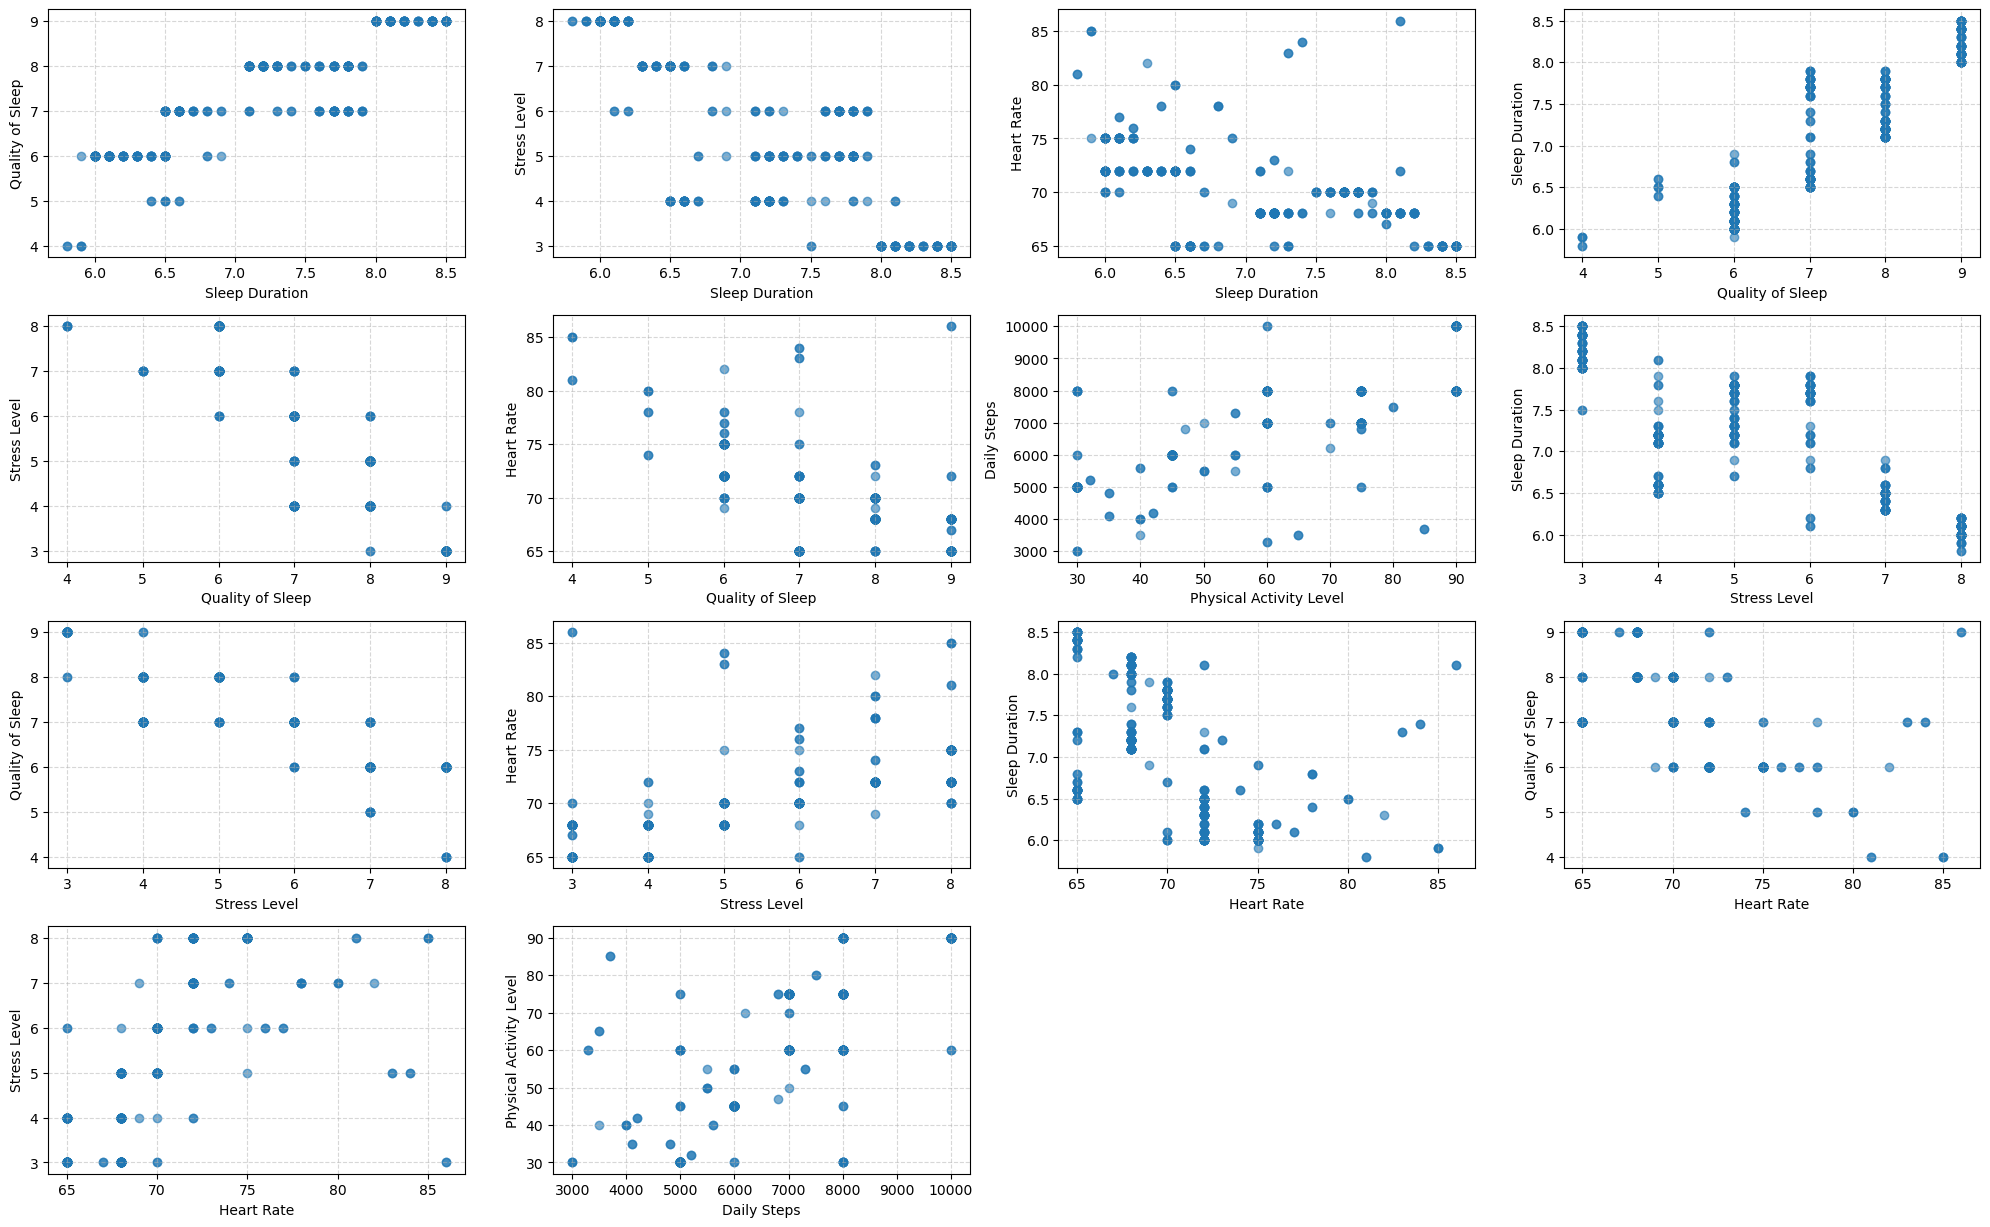

In [36]:
# Create a figure and specify its size
fig = plt.figure(figsize=(20, 15))

# Go through the relevant pairs and create one plot for each
figure_index = 1
for combination in relevant_pairs:
    # Add a sub plot to the figure
    axs = fig.add_subplot(5, 4, figure_index)  # Adjust grid size dynamically (3 rows x 2 columns)
    
    # Plot the feature combination
    axs.scatter(df[combination[0]], df[combination[1]], alpha=0.6)
    
    # Set the axis labels of the current sub plot
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
    axs.grid(True, linestyle='--', alpha=0.5)
        
    # Increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index += 1

# Improve layout and display
plt.tight_layout()
plt.show()

## Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [38]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [39]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
# Calculate accuracy and display evaluation metrics
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc}")

Model Accuracy: 0.9066666666666666


              precision    recall  f1-score   support

     unknown       0.82      0.88      0.85        16
 sleep apnea       0.92      0.75      0.83        16
    insomnia       0.93      0.98      0.95        43

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.91      0.91      0.90        75

[[14  1  1]
 [ 2 12  2]
 [ 1  0 42]]


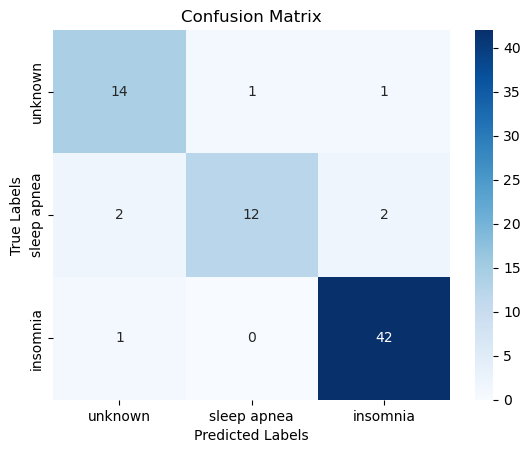

In [48]:
class_names = ["unknown", "sleep apnea", "insomnia"]

print(classification_report(y_test, y_pred, target_names=class_names))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Display logistic regression coefficients
coefficients = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                    Feature  Coefficient
8            Blood Pressure     0.761677
0                    Gender     0.653387
1                       Age     0.639363
6              Stress Level     0.067554
7              BMI Category     0.017917
5   Physical Activity Level    -0.090512
2                Occupation    -0.112708
4          Quality of Sleep    -0.480397
9                Heart Rate    -0.769351
3            Sleep Duration    -0.785495
10              Daily Steps    -0.926291


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
y_pred = dtc.predict(X_test)

In [53]:
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc}")

Model Accuracy: 0.9066666666666666


              precision    recall  f1-score   support

     unknown       0.78      0.88      0.82        16
 sleep apnea       0.92      0.75      0.83        16
    insomnia       0.95      0.98      0.97        43

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75

[[14  1  1]
 [ 3 12  1]
 [ 1  0 42]]


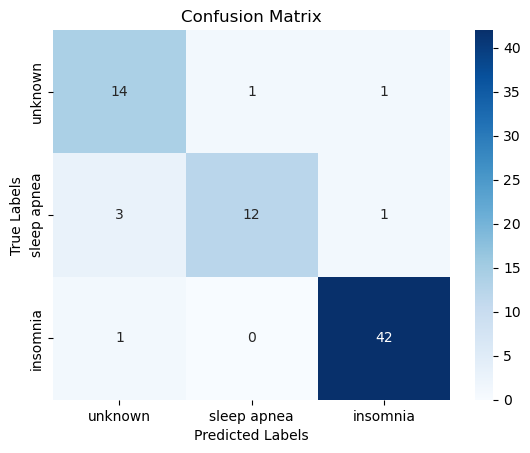

In [54]:
class_names = ["unknown", "sleep apnea", "insomnia"]

print(classification_report(y_test, y_pred, target_names=class_names))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# import KMeans
from sklearn.cluster import KMeans


estimator = KMeans(n_clusters = 3, n_init=10)

# fit the model and return the clusters
labels = estimator.fit_predict(X)

# print the cluster ids of each example
print(labels)

C:\Users\jamar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [57]:
X.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')

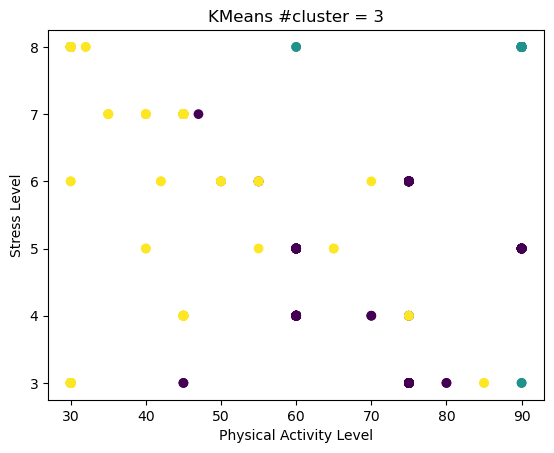

In [58]:
# import matplotlib
import matplotlib.pyplot as plt

# set the title of the plot
plt.title("KMeans #cluster = 3")

# set the axis labels
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')

# create a scatter plot with ItemsBought on the x-axis, ItemsReturned on the y-axis, and the cluster id as colour
plt.scatter(X['Physical Activity Level'], X['Stress Level'], c=labels)

# show the plot
plt.show()